# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import numpy as np

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html). Inspect the page to identify which elements to scrape. Note that the URL is `https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html`.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
response = browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
bs = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
bs.prettify()

'<html lang="en">\n <head>\n  <meta charset="utf-8"/>\n  <meta content="width=device-width, initial-scale=1" name="viewport"/>\n  <meta content="" name="description"/>\n  <meta content="Mark Otto, Jacob Thornton, and Bootstrap contributors" name="author"/>\n  <meta content="Hugo 0.84.0" name="generator"/>\n  <title>\n   Mars Temperature Data\n  </title>\n  <link href="https://getbootstrap.com/docs/5.0/examples/jumbotron/" rel="canonical"/>\n  <!-- Bootstrap core CSS -->\n  <link crossorigin="anonymous" href="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/css/bootstrap.min.css" integrity="sha384-ggOyR0iXCbMQv3Xipma34MD+dH/1fQ784/j6cY/iJTQUOhcWr7x9JvoRxT2MZw1T" rel="stylesheet"/>\n  <style>\n   .bd-placeholder-img {\n      font-size: 1.125rem;\n      text-anchor: middle;\n      -webkit-user-select: none;\n      -moz-user-select: none;\n      user-select: none;\n    }\n\n    @media (min-width: 768px) {\n      .bd-placeholder-img-lg {\n        font-size: 3.5rem;\n      }\n    }\n  </st

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
rows = []
# Loop through the scraped data to create a list of rows
results = bs.find_all('tr', class_='data-row')
# results = bs.find_all('table', class_ = 'table')

In [7]:
for result in results:
    
    row_text = []
    
    row = result.find_all('td')
    
    for each in row:
    
        text = each.text.strip()
        
        row_text.append(text)
    
    # Add to the list
    rows.append(row_text)
        
rows

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [8]:
heading = bs.find_all("table", class_ = 'table')

head = heading[0] # 0th item is the header row

headings = []
for heading in head.find_all("th"): 
    
    heading = (heading.text).rstrip("\n")

   
    headings.append(heading)

headings

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [9]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(data=rows,columns=headings)

In [10]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [11]:
# Examine data type of each column

df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [20]:
# Change data types for data analysis
df['id'] = df['id'].astype(int)
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(int)
df['month'] = df['month'].astype(int)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)

In [21]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [22]:
# 1. How many months are there on Mars?

months = df['month'].nunique()
months

12

In [29]:
# 2. How many Martian days' worth of data are there?
days = df['sol'].nunique()
days

1867

In [111]:
# 3. What is the average low temperature by month?
month_group = df.groupby('month')
avg_temp = month_group['min_temp'].mean()

month
8   -68.382979
Name: min_temp, dtype: float64

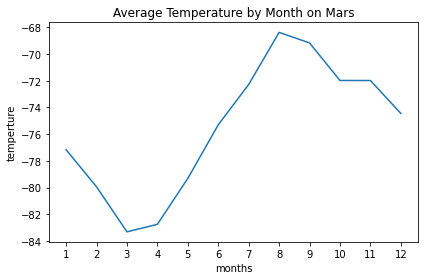

In [146]:
# Plot the average temperature by month

month = np.arange(len(avg_temp))

plt.plot(month,avg_temp)

#labels
labels = ['1', '2', '3', "4", "5", '6', '7', '8', '9', '10', '11', '12']

#create xticks
plt.xticks(month, labels)

#add title 
plt.title("Average Temperature by Month on Mars")

#label xaxis
plt.xlabel("months")

#lable yaxis
plt.ylabel("temperture")

#adjust chart layout 
plt.tight_layout()     

In [112]:
# Identify the coldest and hottest months in Curiosity's location
min_temp = avg_temp.nlargest(1)
min_temp

month
8   -68.382979
Name: min_temp, dtype: float64

In [113]:
max_temp = avg_temp.nsmallest(1)
max_temp

month
3   -83.307292
Name: min_temp, dtype: float64

In [55]:
# 4. Average pressure by Martian month
month_group = df.groupby('month')
avg_pres = month_group['pressure'].mean()
avg_pres = round(avg_pres, 2)
avg_pres

month
1     862.49
2     889.46
3     877.32
4     806.33
5     748.56
6     745.05
7     795.11
8     873.83
9     913.31
10    887.31
11    857.01
12    842.16
Name: pressure, dtype: float64

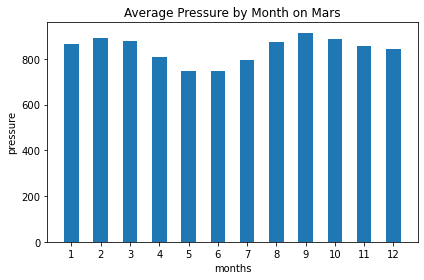

In [56]:
# Plot the average pressure by month
month = np.arange(len(avg_temp))

plt.bar(month,avg_pres, width=.5, alpha=1, align="center")

#labels
labels = ['1', '2', '3', "4", "5", '6', '7', '8', '9', '10', '11', '12']

#create xticks
plt.xticks(month, labels)

#add title 
plt.title("Average Pressure by Month on Mars")

#label xaxis
plt.xlabel("months")

#lable yaxis
plt.ylabel("pressure")

#adjust chart layout 
plt.tight_layout()   

In [167]:
# About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
days = list(df.index)
temps = list(df['min_temp'])

There are peaks at roughly 75 days, 750 days and 1425 days based on the line graph.
Using these peaks, we can estimate that there are roughly 675 Earth days in a Martian year.


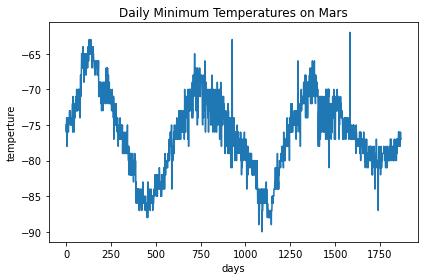

In [173]:
plt.plot(days,temps)

day = np.arange(len(temps))

# labels = ['0', '250', '500', "750", "1000", '1250', '1500', '1750']

#create xticks
# plt.xticks(day, labels)

plt.title("Daily Minimum Temperatures on Mars")

#label xaxis
plt.xlabel("days")

#lable yaxis
plt.ylabel("temperture")

#adjust chart layout 
plt.tight_layout()     

year = (750 - 75)
year
print('There are peaks at roughly 75 days, 750 days and 1425 days based on the line graph.')
print(f'Using these peaks, we can estimate that there are roughly {year} Earth days in a Martian year.')

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [176]:
# Write the data to a CSV
part2_data = '../Starter_Code/mars_part2_data.csv'
df.to_csv(part2_data, index=False)

In [177]:
browser.quit()